In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [10]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Divide the dataset into two sets, by making a new column based on the region:
1. "Bejaia Region dataset" as 0
2. "Sidi-Bel Abbes Region" as 1

In [11]:
df.loc[:121, "Region"] = 0
df.loc[122:, "Region"] = 1

In [12]:
df.loc[122:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0
130,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1.0


In [13]:
df["Region"] = df["Region"].astype("int")

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [16]:
# Removing null values
df = df.dropna().reset_index(drop=True)


In [17]:
df.drop(index=122, inplace=True)

In [18]:
df.reset_index(drop=True, inplace=True)

In [20]:
df.loc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1


In [21]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### Fix spaces in column names

In [22]:
df.columns = df.columns.str.strip()

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


#### Change the required columns as integer or float

In [25]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype("int")

In [26]:
object_col = df.select_dtypes(include="O")
object_col = object_col.columns.tolist()
for i in object_col:
    if i!="Classes":
        df[i] = df[i].astype("float")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df.to_csv("Algerian_Forest_Fire_Cleaned_Dataset.csv", index=False)

### EDA

In [30]:
df1 = df.copy()

Right now, the problem statement is to predict the FWI so the day, month, and year columns are not required now.

In [31]:
df1 = df1.drop(columns=["day", "month", "year"])

In [32]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#### Encode the categories in Calsses

In [33]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [34]:
df1["Classes"] = df["Classes"]
df1["Classes"] = df1["Classes"].str.strip()
df1["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [35]:
df1["Classes"] = np.where(df1["Classes"]=="not fire", 0, 1)

In [36]:
df1["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [38]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


#### Plot the density plots for all features

In [107]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

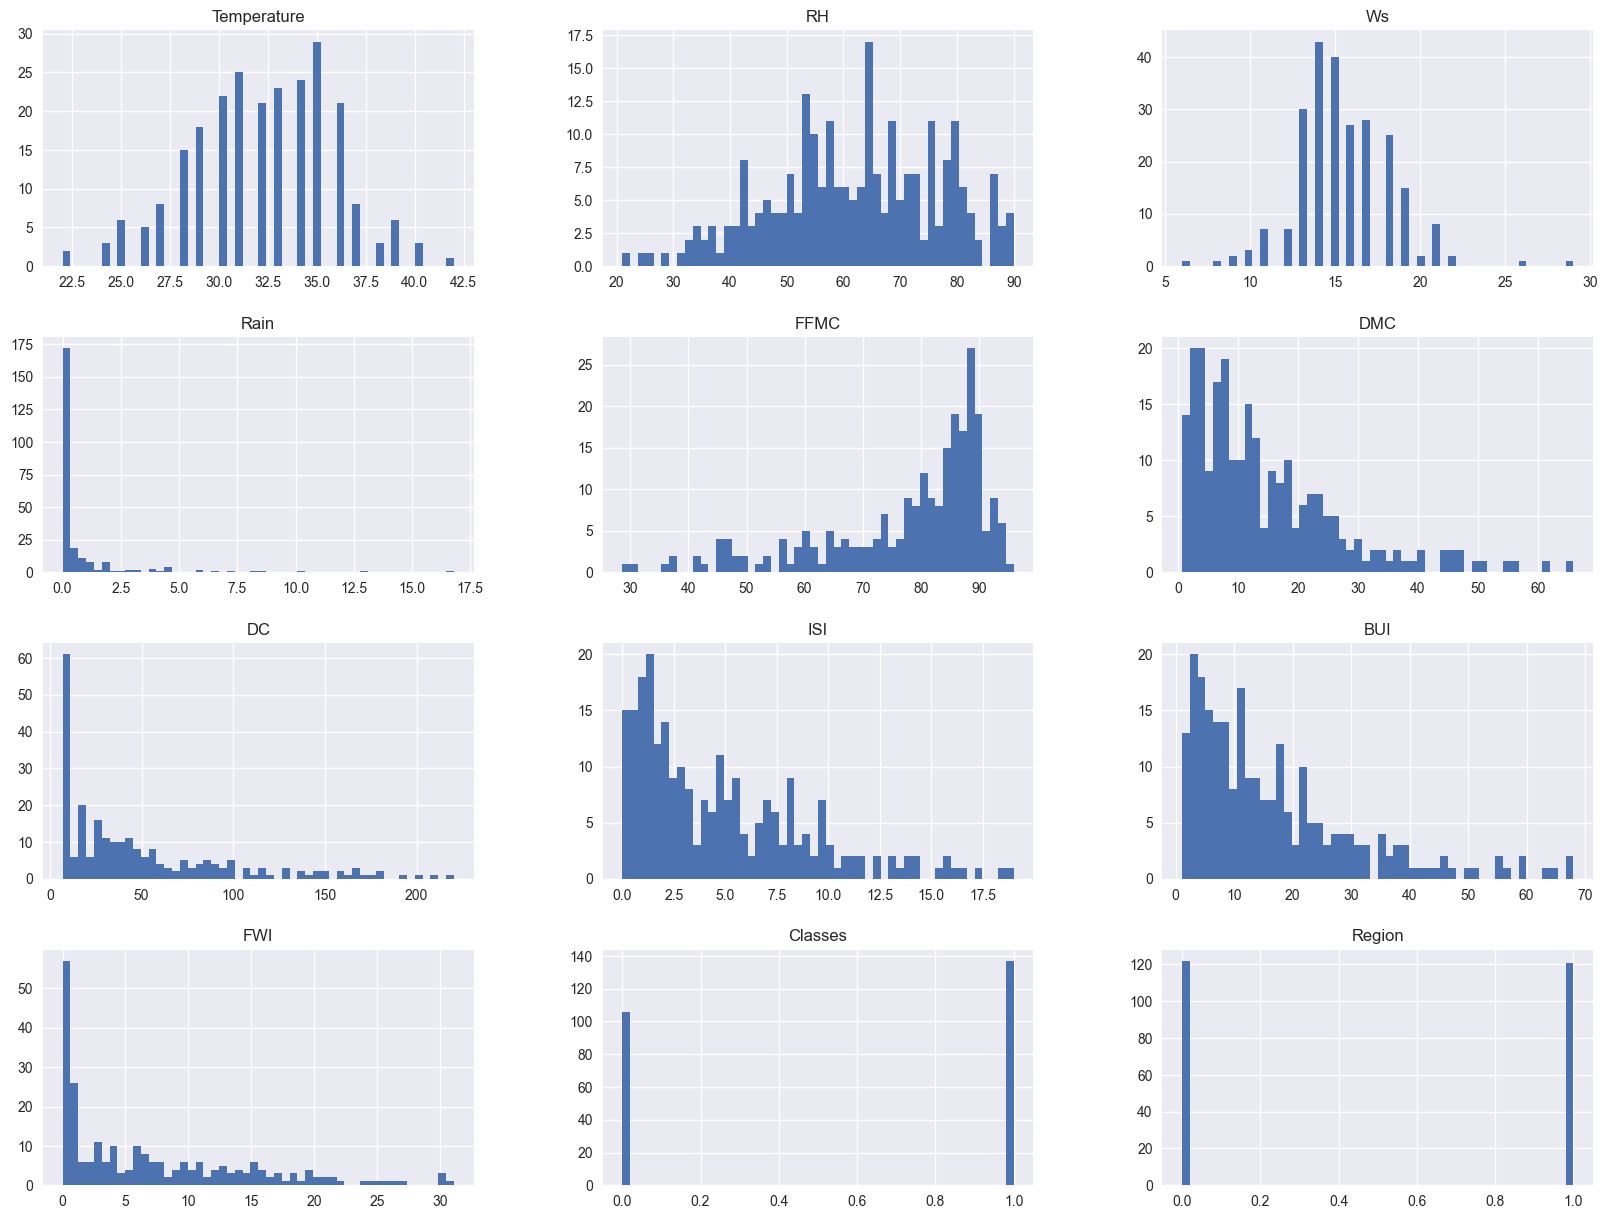

In [40]:
plt.style.use("seaborn-v0_8")
df1.hist(bins=50, figsize=(20,15))
plt.show()

#### Percentage for Pie Chart

<Axes: ylabel='count'>

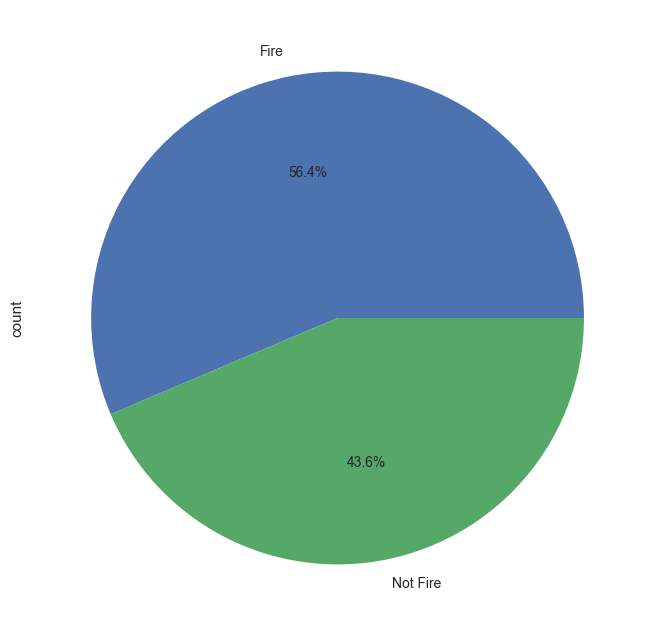

In [41]:
plt.figure(figsize=(10,8))
df1["Classes"].value_counts().plot(kind="pie", labels=["Fire", "Not Fire"], autopct="%1.1f%%")

#### Correlation

In [42]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

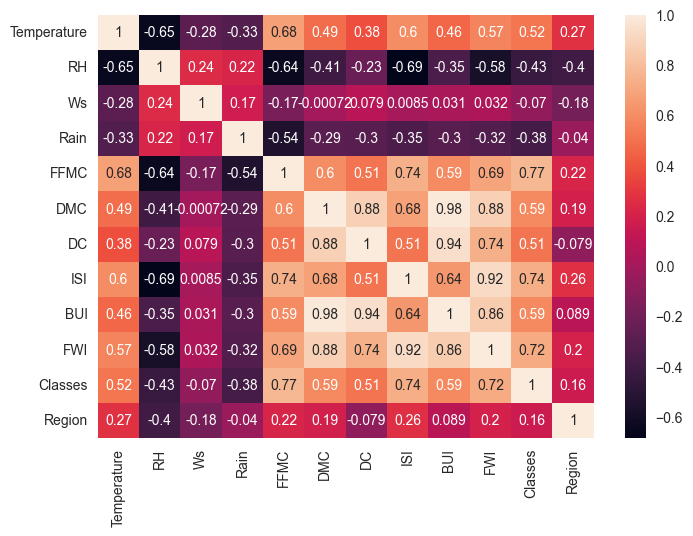

In [44]:
sns.heatmap(df1.corr(), annot=True)

#### Box Plot

<Axes: xlabel='FWI'>

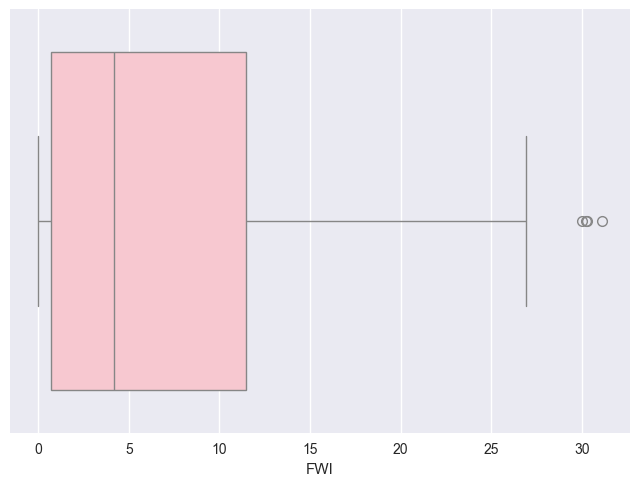

In [45]:
sns.boxplot(df1["FWI"], orient='h', color='pink')

#### Forest fire analysis by month in both regions

In [46]:
df1["month"] = df["month"]

In [47]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,month
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,6
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,6
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,6
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,6
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,6


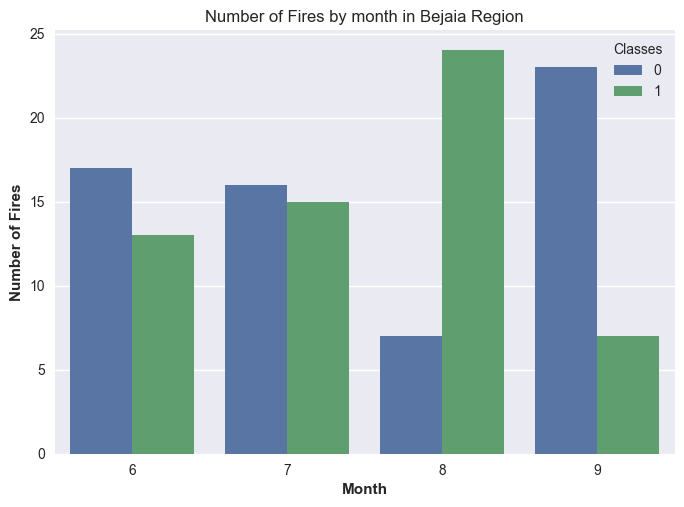

In [49]:
df2 = df1[df1["Region"] == 0]
sns.countplot(x="month", hue="Classes", data=df2)
plt.ylabel("Number of Fires", weight="bold")
plt.xlabel("Month", weight="bold")
plt.title("Number of Fires by month in Bejaia Region")
plt.show()

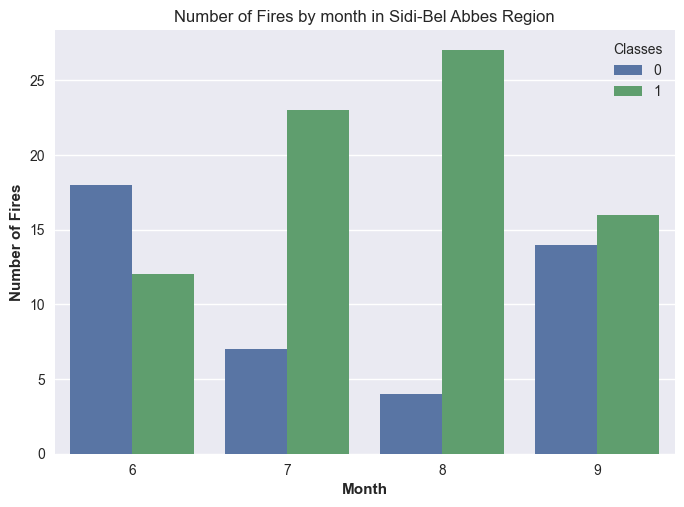

In [131]:
df2 = df1[df1["Region"] == 1]
sns.countplot(x="month", hue="Classes", data=df2)
plt.ylabel("Number of Fires", weight="bold")
plt.xlabel("Month", weight="bold")
plt.title("Number of Fires by month in Sidi-Bel Abbes Region")
plt.show()

Observations:
1. In the bejaia region, August is the month with the maximum number of forest fires.
2. In the Sidi-Bel Abbes Region, July and August are the months with maximum fires.
3. Sidi-Bel Abbes has consecutively high forest fires from july, august, and september, unlike bajaia, which has high forest fires in the months of July and August only and sees a sharp drop in september.

In [132]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,month
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,6
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,6
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,6
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,6
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,6


### Feature Selection

In [50]:
df3 = df1.drop(columns=["month"])

In [51]:
df3.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [52]:
df3["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

#### Independent and Dependent Features

In [53]:
X=df3.drop("FWI", axis=1)
y=df3["FWI"]

In [54]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [55]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

#### Train Test  Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

#### Feature selection
Remove independent features that are highly correlated with each other

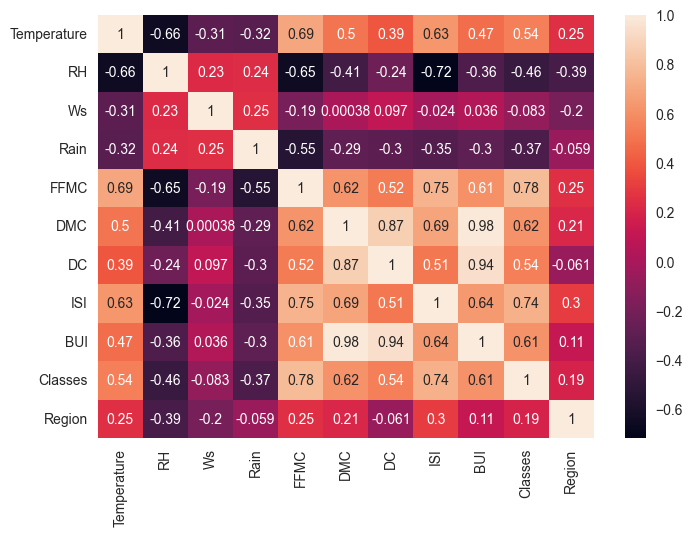

In [58]:
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [60]:
def correlation(dataset, threshold):
    col_corr = set()
    corr = dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j] > threshold):
                col_name = corr.columns[i]
                col_corr.add(col_name)
    return col_corr

In [61]:
correlation(X_train, 0.9)  #Features that are highly positively correlated can be dropped

{'BUI'}

In [62]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

Drop features when correlation is more than 0.85, This threshold value will be decided by domain expertise

In [63]:
X_train.drop(columns=corr_features, inplace=True)
X_test.drop(columns=corr_features, inplace=True)

In [64]:
X_train.head()
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [65]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

#### Box plot visualization

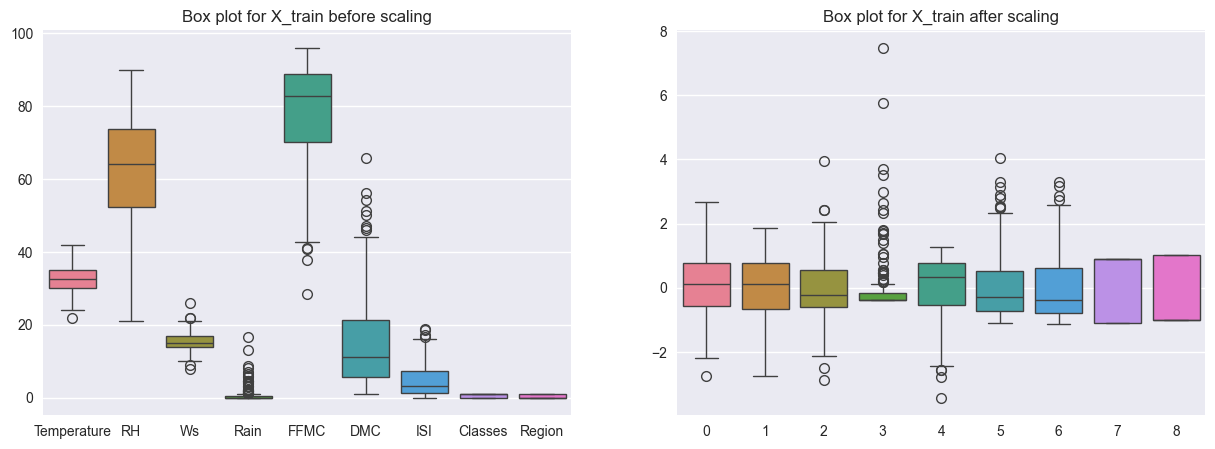

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Box plot for X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("Box plot for X_train after scaling")
plt.show()

### Linear Regression Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)

Mean squared erorr =  0.674276687379158
Score =  0.9847657384266951


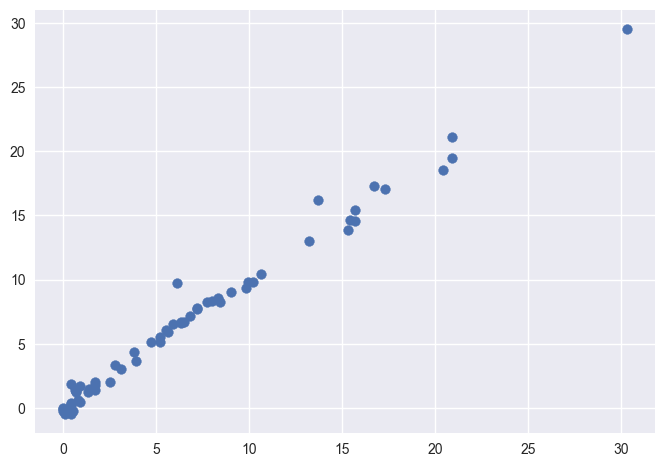

In [74]:
plt.scatter(y_test, y_pred)
plt.show()

Since, y test and y pred follow linear relationship, that means that the regression line is a good fit.

In [75]:
y_test.shape,y_pred.shape

((61,), (61,))

### Lasso Regression

Mean squared erorr =  2.2483458918974772
Score =  0.9492020263112388


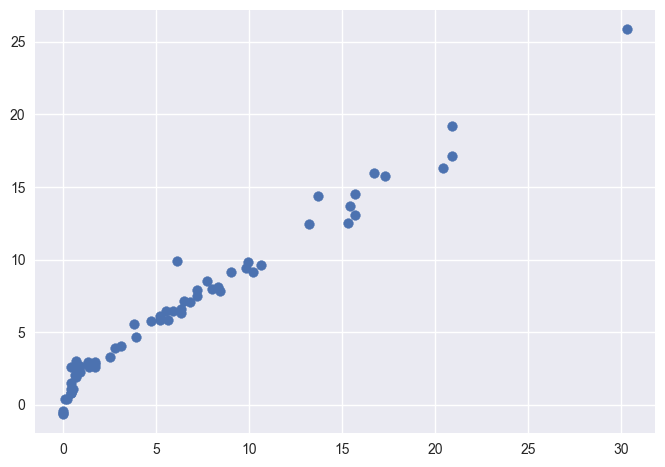

In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)
plt.scatter(y_test, y_pred)
plt.show()

### Ridge Regression

Mean squared erorr =  0.6949198918152096
Score =  0.9842993364555512


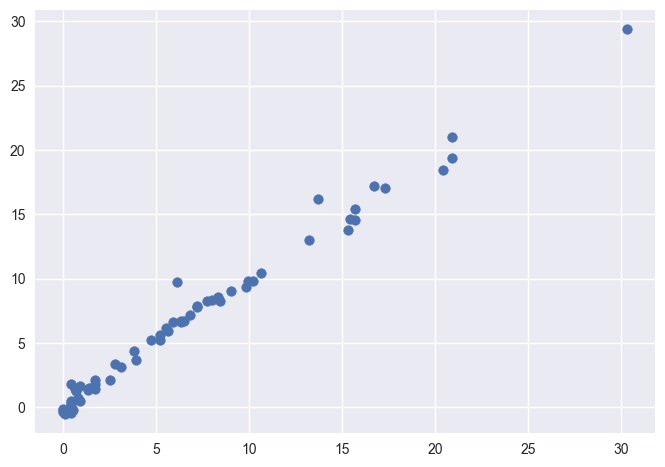

In [77]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)
plt.scatter(y_test, y_pred)
plt.show()

### Elastic Net Regression

Mean squared erorr =  5.5172511010252245
Score =  0.8753460589519703


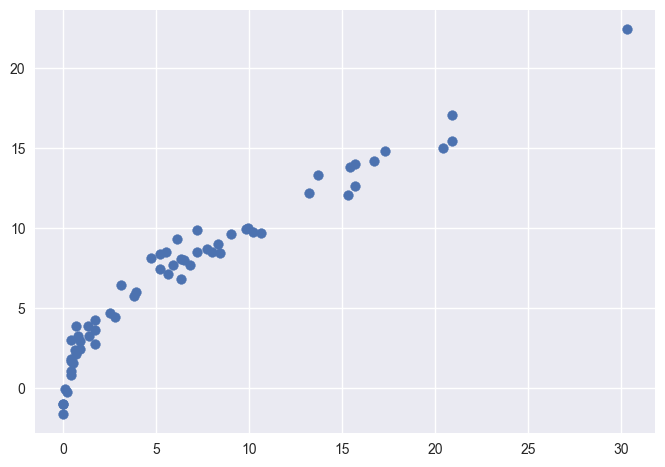

In [78]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)
plt.scatter(y_test, y_pred)
plt.show()

### Hyperparameter Tuning: Lasso Cross Validation

In [79]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [80]:
y_pred = lassocv.predict(X_test_scaled)

In [81]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [82]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [83]:
lassocv.alphas_.shape

(100,)

In [84]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [87]:
lassocv.mse_path_.shape

(100, 5)

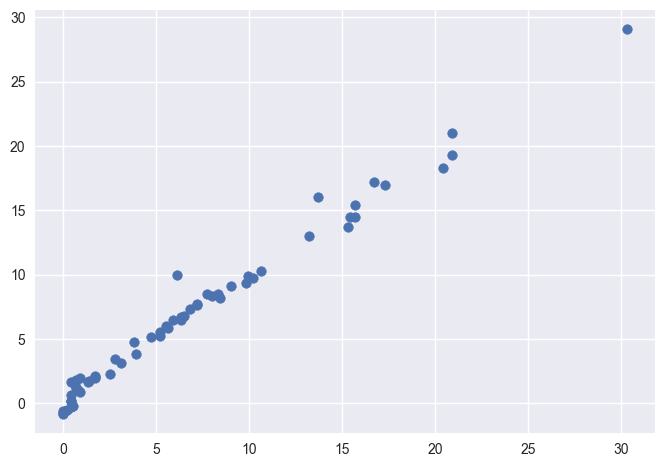

In [88]:
plt.scatter(y_test, y_pred)

In [89]:
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)

Mean squared erorr =  0.792499555474362
Score =  0.9820946715928275


### Hyperparameter Tuning: Ridge Cross Validation

Mean squared erorr =  0.6949198918151945
Score =  0.9842993364555516


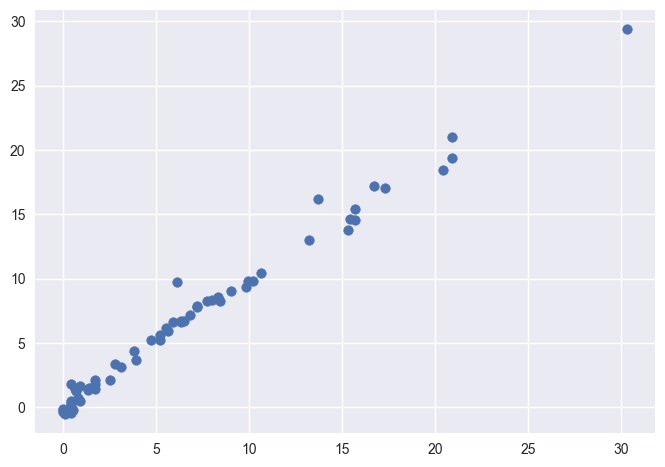

In [90]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [91]:
ridgecv.alpha_

np.float64(1.0)

In [92]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

### Hyperparameter Tuning: Elastic Net Cross Validation

Mean squared erorr =  0.8222830416276258
Score =  0.9814217587854941


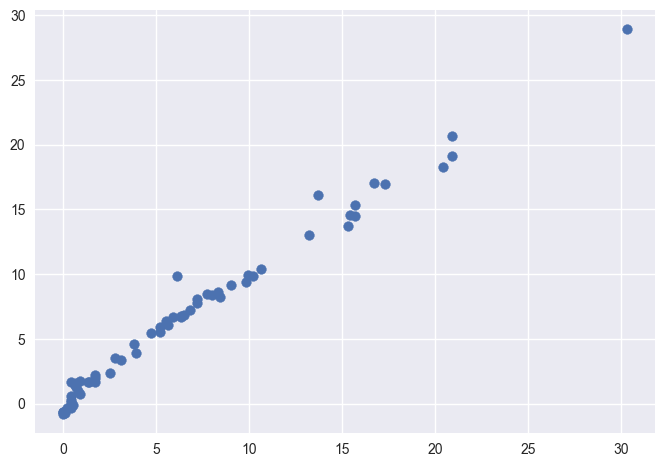

In [93]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean squared erorr = ", mse)
print("Score = ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [94]:
elasticnetcv.alpha_

np.float64(0.04311146156383891)

In [95]:
elasticnetcv.l1_ratio_

np.float64(0.5)

In [222]:
elasticnetcv.coef_

array([-0.        , -0.19081149,  0.05486916, -0.        , -0.50794865,
        3.59828374,  4.50431349,  0.41864659, -0.32815292])

In [223]:
elasticnetcv.mse_path_

array([[53.99690233, 65.39074075, 54.89628985, 77.90299066, 43.34226941],
       [52.57580575, 64.62234745, 53.744793  , 77.60921421, 42.30310502],
       [51.11104709, 62.99703302, 52.17649022, 76.53887034, 41.00613837],
       [49.61037668, 61.26183674, 50.57039748, 74.67053859, 39.67994098],
       [48.07677137, 59.48562789, 48.86189586, 72.53190776, 38.32743244],
       [46.08919463, 57.21227804, 46.85067587, 69.99343362, 36.64273851],
       [43.93304229, 54.81307   , 44.65826477, 67.19431714, 34.65787048],
       [41.80546452, 52.43573064, 42.39238637, 64.39190172, 32.6541552 ],
       [39.71309973, 50.06862734, 40.16732063, 61.6188179 , 30.67748611],
       [37.63649808, 47.60730813, 37.96880498, 58.88319233, 28.76304656],
       [35.48905272, 45.2114555 , 35.74224936, 56.09403417, 26.91571606],
       [33.36370035, 42.89274496, 33.46771793, 53.24006353, 25.13971517],
       [31.29021796, 40.65450553, 31.2980323 , 50.46056554, 23.40823907],
       [29.31299261, 38.49931979, 29.2

In [224]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [96]:
elasticnetcv.n_features_in_

9

In [97]:
import pickle
pickle.dump(scaler,open("scaler.pkl", "wb"))
pickle.dump(ridge,open("ridge.pkl", "wb"))